## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load datasets

In [2]:
customers = pd.read_csv("Dataset/Customers.csv")
products = pd.read_csv("Dataset/Products.csv")
transactions = pd.read_csv("Dataset/Transactions.csv")

## Preview datasets

In [3]:
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

## Check for missing values

In [4]:

print("Missing values in Customers:\n", customers.isnull().sum())
print("Missing values in Products:\n", products.isnull().sum())
print("Missing values in Transactions:\n", transactions.isnull().sum())

Missing values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


## Merge data for comprehensive analysis

In [5]:
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

## Setting a consistent style for visualizations

In [6]:
sns.set_theme(style="whitegrid")

# Visualizations

### 1. Customer Distribution by Region

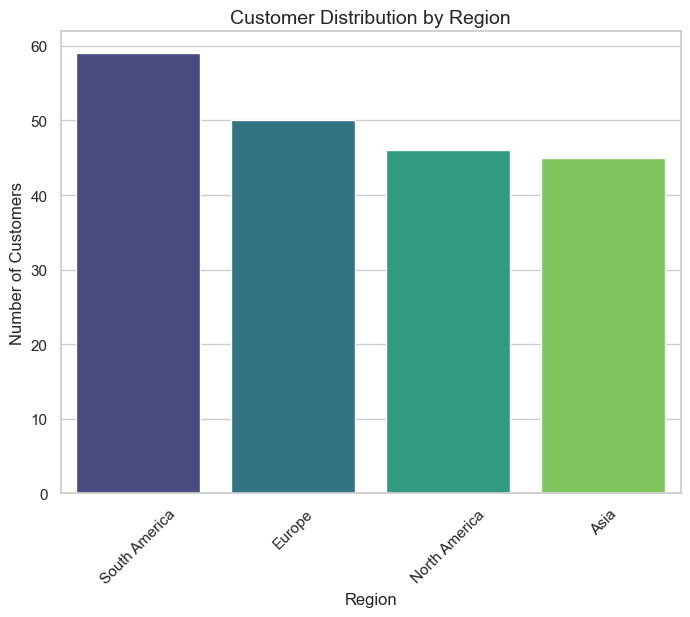

In [7]:
plt.figure(figsize=(8, 6))
region_counts = customers['Region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis", saturation=0.8)
plt.title('Customer Distribution by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### 2. Monthly Sales Trend

c:\Users\abini\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\abini\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


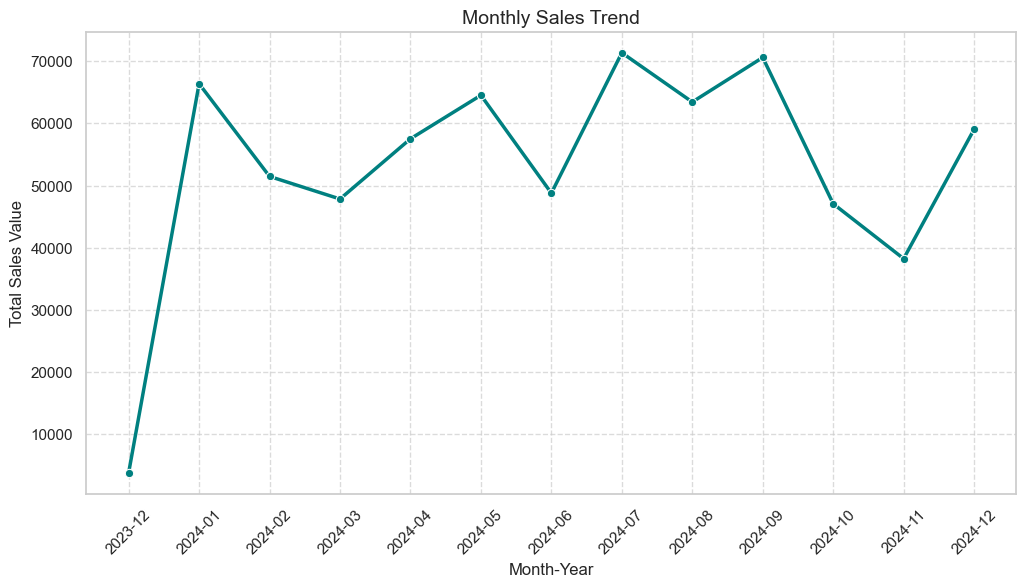

In [8]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['MonthYear'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('MonthYear')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.index = monthly_sales.index.astype(str)
sns.lineplot(data=monthly_sales, marker='o', linewidth=2.5, color="teal")
plt.title('Monthly Sales Trend', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Sales Value', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 3. Top 10 Best-Selling Products

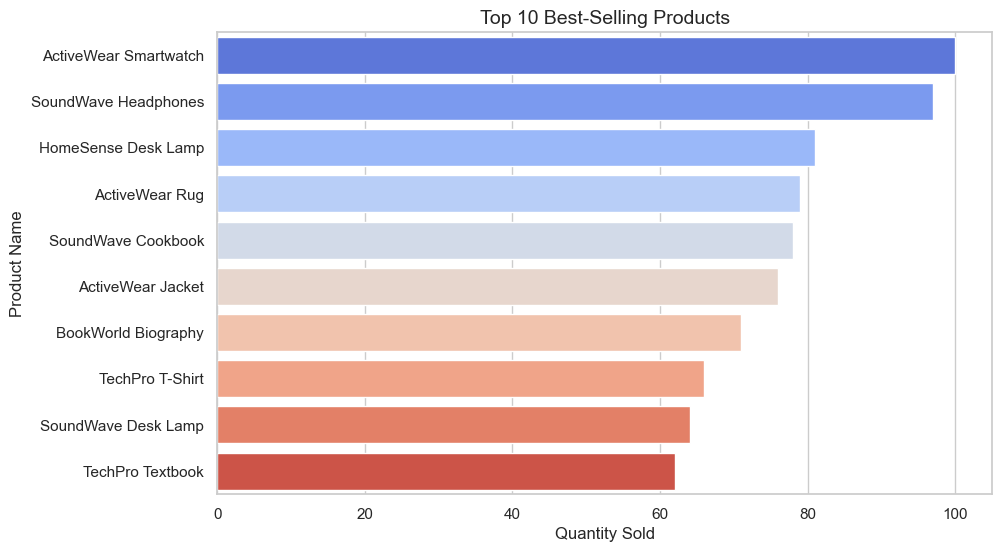

In [9]:
plt.figure(figsize=(10, 6))
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm", saturation=0.9)
plt.title('Top 10 Best-Selling Products', fontsize=14)
plt.xlabel('Quantity Sold', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.show()

### 4. Average Price by Product Category

C:\Users\abini\AppData\Local\Temp\ipykernel_23720\622630875.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x=products['Category'], y=products['Price'], jitter=True, palette="Set2", size=8, alpha=0.7)
c:\Users\abini\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\abini\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\abini\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you wi

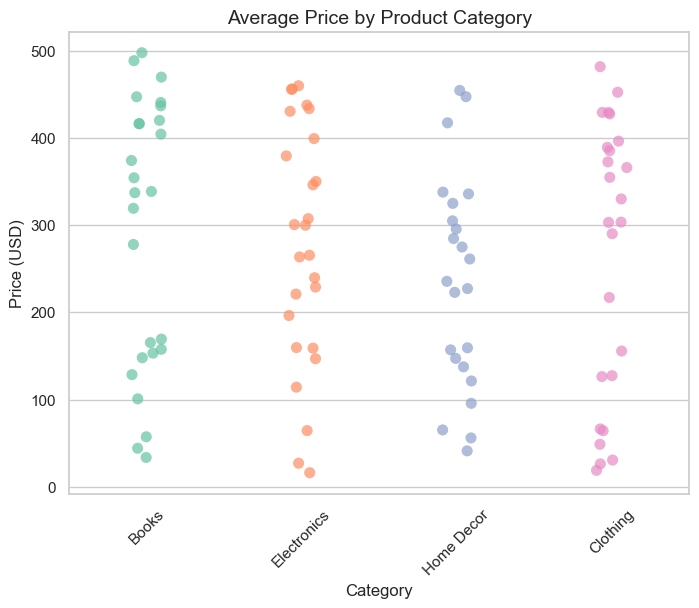

In [10]:
plt.figure(figsize=(8, 6))
sns.stripplot(x=products['Category'], y=products['Price'], jitter=True, palette="Set2", size=8, alpha=0.7)
plt.title('Average Price by Product Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### 5. Sales Value by Region

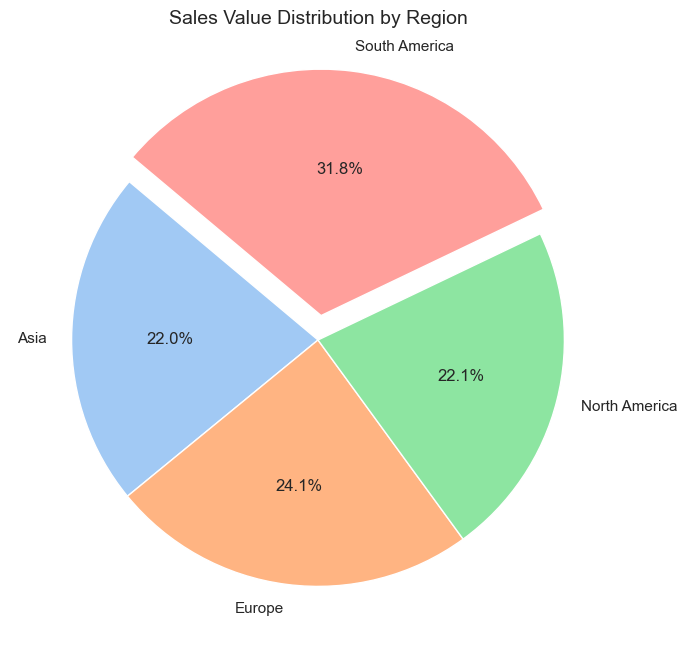

In [11]:
plt.figure(figsize=(8, 8))
region_sales = merged_data.groupby('Region')['TotalValue'].sum()
explode = [0.1 if region == region_sales.idxmax() else 0 for region in region_sales.index]
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', explode=explode, startangle=140, colors=sns.color_palette("pastel"))
plt.title('Sales Value Distribution by Region', fontsize=14)
plt.show()

### 6. Correlation Heatmap
 To check for duplicate columns

In [12]:
print(merged_data.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y', 'MonthYear'],
      dtype='object')


Clean up duplicate columns

In [13]:
merged_data.rename(columns={"Price_y": "Price"}, inplace=True)
merged_data.drop(columns=["Price_x"], inplace=True)

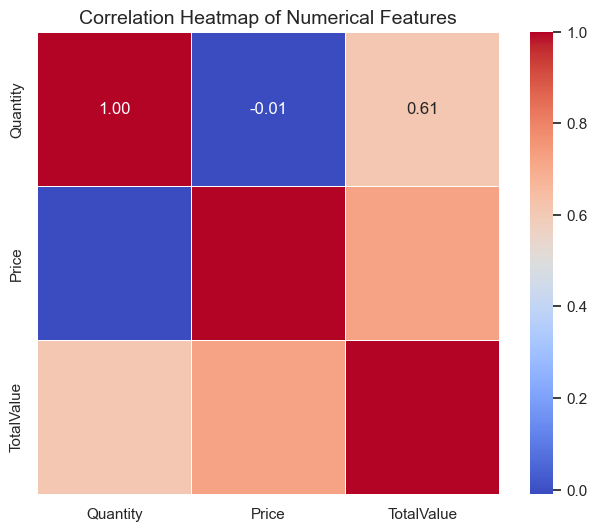

In [ ]:
plt.figure(figsize=(8, 6))
correlation_matrix = merged_data[['Quantity', 'Price', 'TotalValue']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5, square=True)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.show()